<a href="https://colab.research.google.com/github/pisceno/AI-Generative/blob/main/Tarea_Fundamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Instrucciones iniciales

# Fuente: https://www.kaggle.com/datasets/ayeshaimran123/coffee-sales-trends-data

# 1️.- utiliza el enlace anterior y descarga el archivo del dataset
# 2.- Sube el archivo CSV resultante en la siguiente celda.


In [ ]:

# Subir el archivo CSV manualmente (Coffee_Sales.csv)

from google.colab import files
import pandas as pd

uploaded = files.upload()          # Selecciona el archivo en tu equipo
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
print(f"\n Archivo cargado correctamente: {filename}")
print("Dimensiones del dataset:", df.shape)
df.head()


Saving Coffe_sales.csv to Coffe_sales (2).csv

 Archivo cargado correctamente: Coffe_sales (2).csv
Dimensiones del dataset: (3547, 11)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:

# Importación de librerías y configuración inicial

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

pd.set_option('display.max_columns', 100)
sns.set(style='whitegrid')


In [ ]:
#  Inspección inicial del dataset

display(df.head(10))
print("\n--- INFO ---")
df_info = df.info()
desc_num = df.describe().T
desc_all = df.describe(include='all').T

print("\n--- SHAPE ---")
print(df.shape)

print("\n--- DESCRIPCIÓN NUMÉRICAS ---")
display(desc_num)

print("\n--- DESCRIPCIÓN COMPLETA (incluye categóricas) ---")
display(desc_all)

num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print(f"\nVariables numéricas: {num_cols}")
print(f"Variables categóricas: {cat_cols}")

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB

--- SHAPE ---
(3547, 11)

--- DESCRIPCIÓN NUMÉRICAS ---


,count,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,14.185791,4.234010,6.00,10.00,14.00,18.00,22.0
money,3547.0,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
Weekdaysort,3547.0,3.845785,1.971501,1.00,2.00,4.00,6.00,7.0
Monthsort,3547.0,6.453905,3.500754,1.00,3.00,7.00,10.00,12.0



--- DESCRIPCIÓN COMPLETA (incluye categóricas) ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,NaN,NaN,NaN,14.185791,4.23401,6.0,10.0,14.0,18.0,22.0
cash_type,3547,1,card,3547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money,3547.0,NaN,NaN,NaN,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
coffee_name,3547,8,Americano with Milk,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_Day,3547,3,Afternoon,1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekday,3547,7,Tue,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_name,3547,12,Mar,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekdaysort,3547.0,NaN,NaN,NaN,3.845785,1.971501,1.0,2.0,4.0,6.0,7.0
Monthsort,3547.0,NaN,NaN,NaN,6.453905,3.500754,1.0,3.0,7.0,10.0,12.0
Date,3547,381,2024-10-11,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Variables numéricas: ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort']
Variables categóricas: ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Date', 'Time']


In [ ]:

#    faltantes, duplicados y columnas con fechas

missing_pct = df.isna().mean().sort_values(ascending=False)*100
print("Porcentaje de faltantes por columna:")
display(missing_pct.to_frame("faltantes_%"))

dup_count = df.duplicated().sum()
print(f"\nFilas duplicadas: {dup_count}")

candidate_date_cols = []
for c in df.columns:
    if df[c].dtype == 'object':
        sample = df[c].dropna().astype(str).head(20)
        if (sample.str.contains(r'\d{4}[-/]\d{1,2}[-/]\d{1,2}', regex=True).mean() > 0.4):
            candidate_date_cols.append(c)

print("\nPosibles columnas de fecha:", candidate_date_cols)
for c in candidate_date_cols:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce')
        print(f"✓ Convertido a datetime: {c}")
    except:
        print(f"No se pudo convertir: {c}")


Porcentaje de faltantes por columna:


,faltantes_%
hour_of_day,0.0
cash_type,0.0
money,0.0
coffee_name,0.0
Time_of_Day,0.0
Weekday,0.0
Month_name,0.0
Weekdaysort,0.0
Monthsort,0.0
Date,0.0



Filas duplicadas: 0

Posibles columnas de fecha: ['Date']
✓ Convertido a datetime: Date


In [ ]:
# Si no hay nulos, inyectar 3–10 % en dos columnas
total_missing = df.isna().sum().sum()
print("Total de valores nulos antes:", total_missing)

if total_missing == 0:
    rng = np.random.default_rng(42)
    eligible_cols = df.columns.tolist()
    chosen = rng.choice(eligible_cols, size=2, replace=False)
    frac = 0.05
    print(f"Inyectando ~{frac*100:.1f}% de nulos en: {chosen}")
    for col in chosen:
        n = len(df)
        idx = rng.choice(n, size=int(frac*n), replace=False)
        df.loc[idx, col] = np.nan
else:
    print("Ya existen nulos, no se inyectan artificialmente.")

print("Total de nulos después:", df.isna().sum().sum())


Total de valores nulos antes: 0
Inyectando ~5.0% de nulos en: ['hour_of_day' 'Monthsort']
Total de nulos después: 354


In [ ]:

# Tratamiento de nulos:
df_imputed = df.copy()
num_cols = df_imputed.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_imputed.select_dtypes(exclude=np.number).columns.tolist()

# Categóricas: moda
for c in cat_cols:
    if df_imputed[c].isna().any():
        df_imputed[c].fillna(df_imputed[c].mode()[0], inplace=True)

# Numéricas: imputación basada en modelo
if df_imputed[num_cols].isna().sum().sum() > 0:
    imp = IterativeImputer(random_state=123, max_iter=20)
    df_imputed[num_cols] = imp.fit_transform(df_imputed[num_cols])

print("Nulos restantes tras imputación:", df_imputed.isna().sum().sum())


Nulos restantes tras imputación: 0


In [ ]:
# Análisis univariado: estadísticos descriptivos
num_cols = df_imputed.select_dtypes(include=np.number).columns.tolist()
cat_cols = df_imputed.select_dtypes(exclude=np.number).columns.tolist()

summary = []
for c in num_cols:
    s = df_imputed[c].dropna()
    q1, q2, q3 = s.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1
    summary.append({
        'variable': c, 'media': s.mean(), 'mediana': q2,
        'moda': s.mode()[0], 'varianza': s.var(), 'desv_std': s.std(),
        'rango': s.max()-s.min(), 'IQR': iqr,
        'asimetría': s.skew(), 'curtosis': s.kurtosis()
    })

pd.DataFrame(summary).set_index('variable')


,media,mediana,moda,varianza,desv_std,rango,IQR,asimetría,curtosis
variable,,,,,,,,,
hour_of_day,14.186330,14.000000,10.00,17.027998,4.126499,16.00,6.00,0.125376,-1.040087
money,31.645216,32.820000,35.76,23.792481,4.877754,20.58,7.84,-0.544507,-0.671208
Weekdaysort,3.845785,4.000000,2.00,3.886815,1.971501,6.00,4.00,0.082132,-1.224040
Monthsort,6.481349,6.586569,3.00,11.655616,3.414032,11.00,7.00,-0.009942,-1.299473


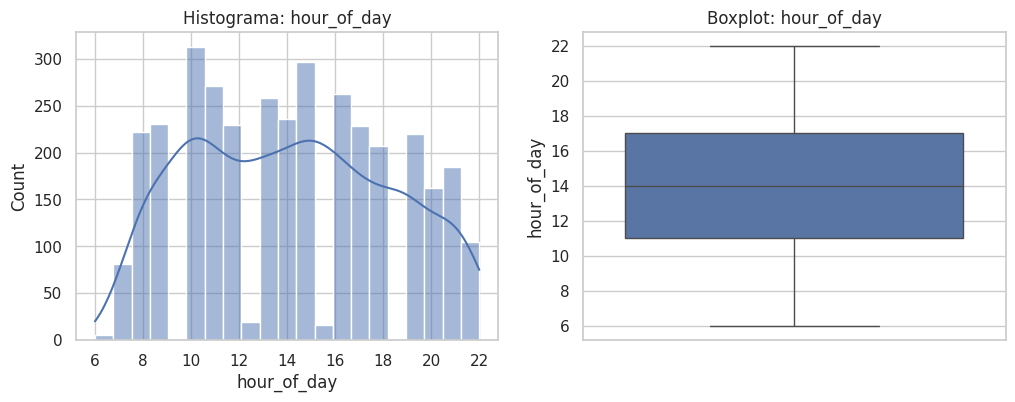

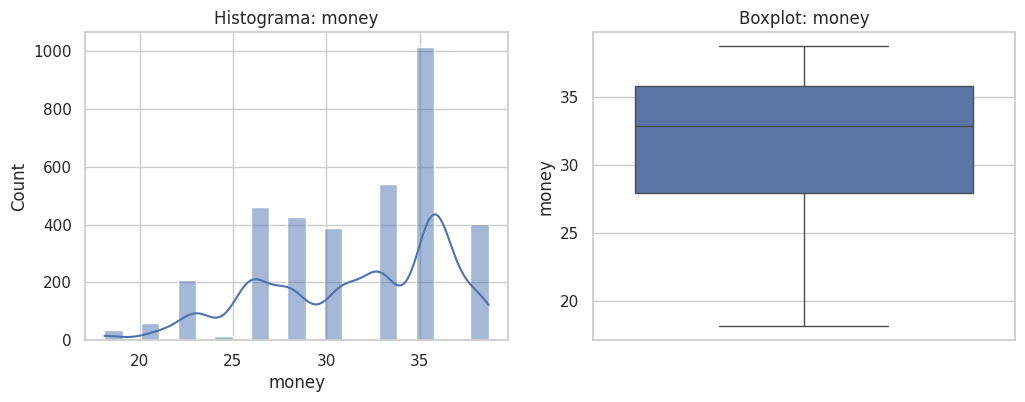

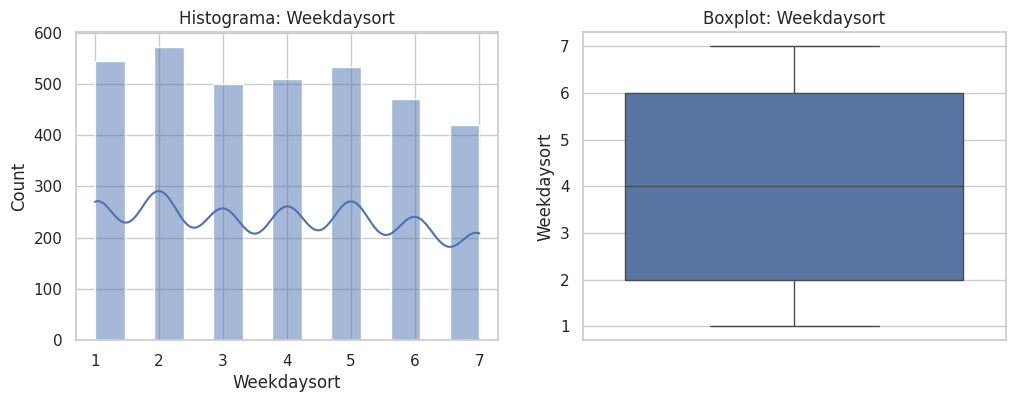

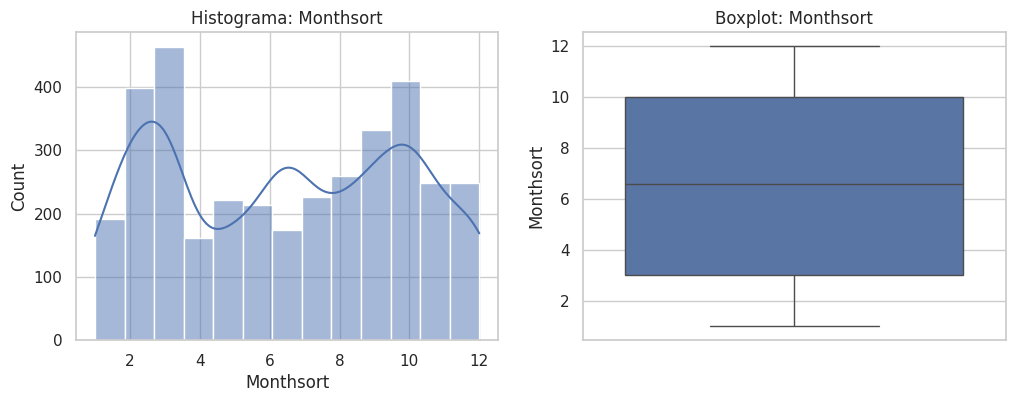

In [ ]:
# Visualizaciones y detección de atípicos (1.5·IQR)
for c in num_cols[:6]:
    fig, ax = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(df_imputed[c], kde=True, ax=ax[0])
    sns.boxplot(y=df_imputed[c], ax=ax[1])
    ax[0].set_title(f'Histograma: {c}')
    ax[1].set_title(f'Boxplot: {c}')
    plt.show()

df_wins = df_imputed.copy()
for c in num_cols:
    s = df_imputed[c].dropna()
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    df_wins[c] = df_imputed[c].clip(low, high)


Variable más sesgada: money (skew=-0.54)
Skew antes: -0.545 | después: -0.175


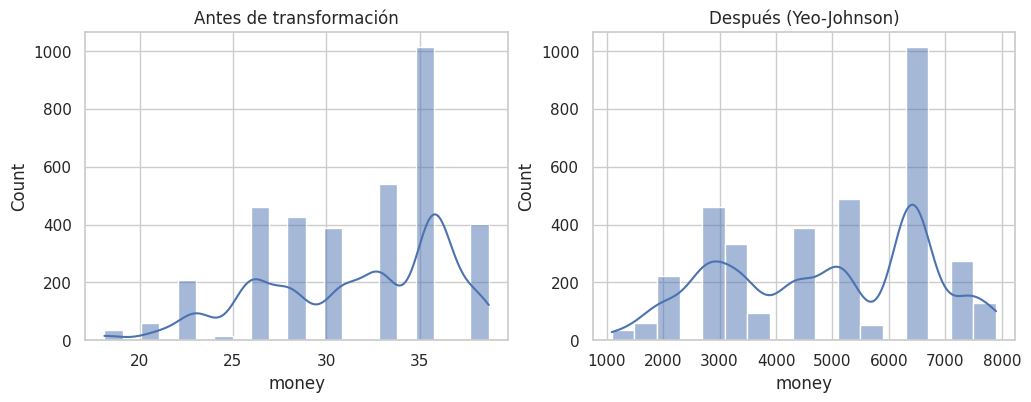

In [ ]:
# Transformación de variable sesgada
from sklearn.preprocessing import PowerTransformer

skews = df_wins[num_cols].skew().abs().sort_values(ascending=False)
target = skews.index[0]
s = df_wins[target]
print(f"Variable más sesgada: {target} (skew={s.skew():.2f})")

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_trans = df_wins.copy()
df_trans[target] = pt.fit_transform(s.values.reshape(-1,1))

print(f"Skew antes: {s.skew():.3f} | después: {df_trans[target].skew():.3f}")

fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.histplot(s, kde=True, ax=ax[0])
sns.histplot(df_trans[target], kde=True, ax=ax[1])
ax[0].set_title("Antes de transformación")
ax[1].set_title("Después (Yeo-Johnson)")
plt.show()


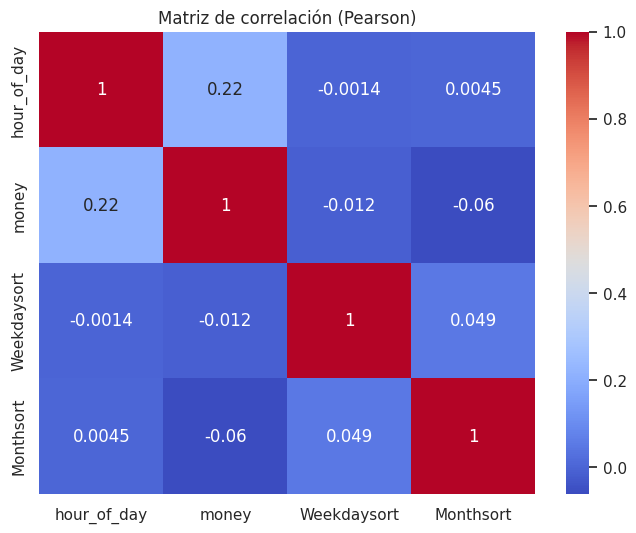

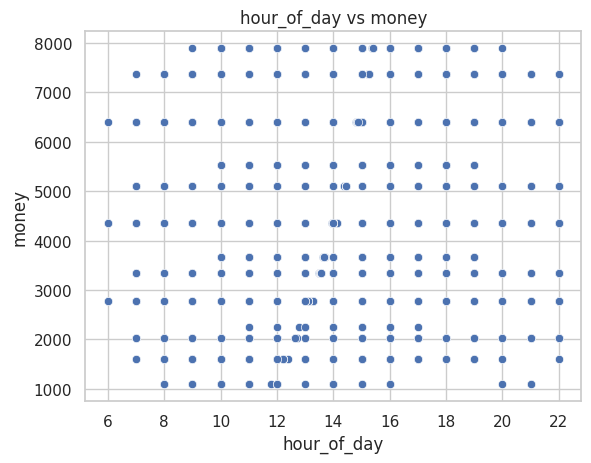

In [ ]:
# Análisis bivariado: numérica vs. numérica
corr = df_trans[num_cols].corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación (Pearson)")
plt.show()

corr_abs = corr.abs()
np.fill_diagonal(corr_abs.values, 0)
pair = np.unravel_index(np.argmax(corr_abs.values), corr_abs.shape)
xvar, yvar = corr_abs.index[pair[0]], corr_abs.columns[pair[1]]

sns.scatterplot(x=df_trans[xvar], y=df_trans[yvar])
plt.title(f'{xvar} vs {yvar}')
plt.show()


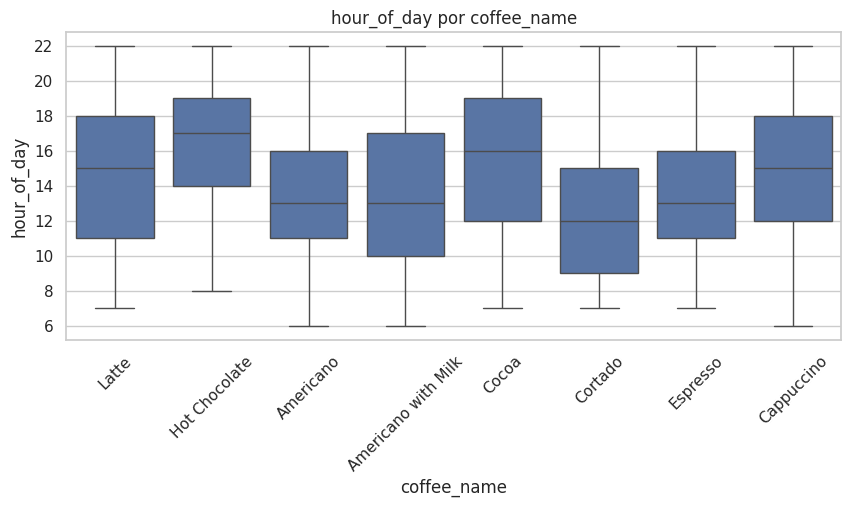

In [ ]:
# Numérica vs. Categórica
cat_candidate = [c for c in cat_cols if 2 <= df_trans[c].nunique() <= 12]
if cat_candidate and num_cols:
    ccat = cat_candidate[0]; cnum = num_cols[0]
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df_trans[ccat], y=df_trans[cnum])
    plt.title(f'{cnum} por {ccat}')
    plt.xticks(rotation=45)
    plt.show()


Time_of_Day,Afternoon,Morning,Night
coffee_name,,,
Americano,233,219,112
Americano with Milk,239,331,239
Cappuccino,164,122,200
Cocoa,75,58,106
Cortado,88,143,56
Espresso,56,44,29
Hot Chocolate,80,49,147
Latte,270,215,272


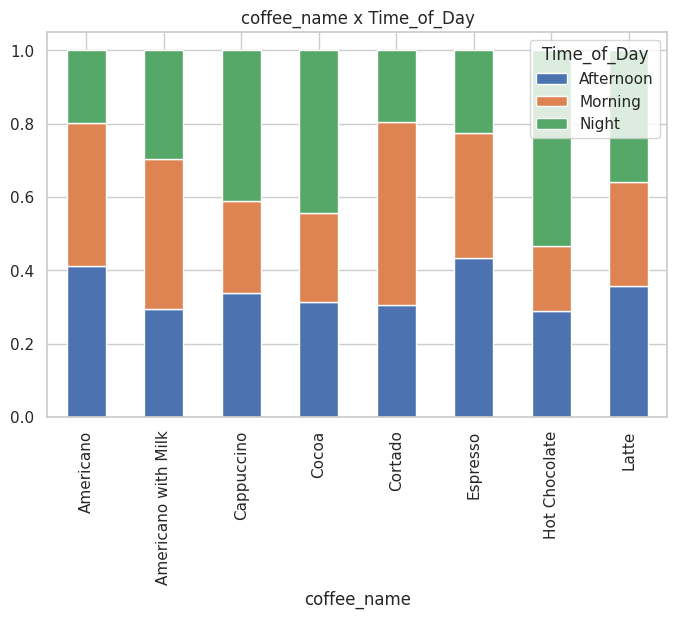

In [ ]:

# Categórica vs. Categórica y multivariado

cats_small = [c for c in cat_cols if 2 <= df_trans[c].nunique() <= 8]
if len(cats_small) >= 2:
    c1, c2 = cats_small[:2]
    ct = pd.crosstab(df_trans[c1], df_trans[c2])
    display(ct)
    ct.div(ct.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f'{c1} x {c2}')
    plt.show()


In [ ]:

# Discretización: pd.cut vs. pd.qcut

if len(num_cols) >= 2:
    base, target = num_cols[:2]
    bins = 5
    cut_bins = pd.cut(df_trans[base], bins=bins)
    qcut_bins = pd.qcut(df_trans[base], q=bins, duplicates='drop')

    print("Balance pd.cut:")
    display(cut_bins.value_counts())
    print("Balance pd.qcut:")
    display(qcut_bins.value_counts())

    cut_mean = df_trans.groupby(cut_bins)[target].mean()
    qcut_mean = df_trans.groupby(qcut_bins)[target].mean()
    display(pd.DataFrame({'cut': cut_mean, 'qcut': qcut_mean}))


Balance pd.cut:


,count
hour_of_day,
"(12.4, 15.6]",822
"(9.2, 12.4]",817
"(15.6, 18.8]",698
"(18.8, 22.0]",672
"(5.984, 9.2]",538


Balance pd.qcut:


,count
hour_of_day,
"(5.999, 10.0]",851
"(10.0, 13.0]",735
"(15.0, 18.0]",729
"(18.0, 22.0]",672
"(13.0, 15.0]",560


/tmp/ipython-input-3740510851.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cut_mean = df_trans.groupby(cut_bins)[target].mean()
/tmp/ipython-input-3740510851.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qcut_mean = df_trans.groupby(qcut_bins)[target].mean()


,cut,qcut
hour_of_day,,
"(5.984, 9.2]",4349.951312,NaN
"(9.2, 12.4]",4495.768684,NaN
"(12.4, 15.6]",4881.105390,NaN
"(15.6, 18.8]",5229.289351,NaN
"(18.8, 22.0]",5424.858016,NaN
"(5.999, 10.0]",NaN,4475.266939
"(10.0, 13.0]",NaN,4423.455044
"(13.0, 15.0]",NaN,4909.982980
"(15.0, 18.0]",NaN,5303.631449
